- KEYWORDS: numpy.linalg.solve



# Applications of linear algebra



Linear algebra is used extensively in engineering applications. Here we consider some examples.




## Application in reaction engineering - Steady state CSTR



Suppose we have first order reactions occurring in a CSTR. We can represent the concentrations of each species in the reactor as a vector: $C = [C_A, C_C, C_D, ...]$.

Let the reactions be $A \rightarrow C$ and $C \rightarrow D$. These reactions happen at these rates:

$r1 = k1 C_A$ and $r2 = k2 C_C$.

We assume a constant volume $V$, and volumetric flow rate $\nu$ into a CSTR, and steady state. It is convenient to define $\tau = V / \nu$. With these assumptions, we can derive the following species mole balances:

$0 = C_{A, feed} - C_A - \tau k1 C_A$

$0 = C_{C, feed} - C_C + \tau k1 C_A - \tau k2 C_C$

$0 = C_{D, feed} - C_D + \tau k2 C_C$

These are not particularly in a useful form, since they do not resemble $\mathbf{A} \mathbf{x} = \mathbf{b}$. We can rearrange them to achieve that. We need all the variables on the left, and any constant terms on the right.

$C_A + \tau k1 C_A = C_{A, feed}$

$C_C - \tau k1 C_A + \tau k2 C_C = C_{C, feed}$

$C_D - \tau k2 C_C = C_{D, feed}$

Now, we can start to see some structure emerge. Let $\mathbf{C} = [C_A, C_C, C_D]$.

Let $\mathbf{A} = \left[\begin{array}{ccc}
 1 + \tau k1 & 0 & 0 \\
 -\tau k1 & 1 + \tau k2 & 0 \\
 0 & -\tau k2 & 1
 \end{array}\right]$

and finally, we have $\mathbf{C_{feed}} = [C_{A,feed}, C_{C, feed}, C_{D, feed}]$. Or, all together:

$\mathbf{A} \mathbf{C} = \mathbf{C_{feed}}$.

Note that we have been talking about these as linear equations, but,  we may also think of them as transformations. Consider this:

$\mathbf{A}^{-1} \mathbf{C_{feed}} = \mathbf{C}$.

Here we can see that $\mathbf{A}^{-1}$ transforms the feed concentrations into the exit concentrations.

Solving these equations is now straightfoward:



In [5]:
import numpy as np

tau = 2.5  # Residence time (min)
C_feed = [2.2, 0.0, 0.0] # mol / L
k1 = 2.3  # 1/min
k2 = 4.5  # 1/min

A = np.array([[1 + tau * k1, 0.0,          0.0],
              [-tau * k1,    1 + tau * k2, 0.0],
              [0.0,          -tau * k2,    1]])

C = np.linalg.solve(A, C_feed)
C_A, C_C, C_D = C
print(f'The exit concentrations are C_A={C_A:1.2f}, C_C={C_C:1.2f}, C_D={C_D:1.2f} mol/L')
print(C_A + C_C + C_D)
A @ C # this should equal the feed concentration.

The exit concentrations are C_A=0.33, C_C=0.15, C_D=1.72 mol/L
2.2


array([ 2.2,  0. ,  0. ])

In [7]:
C, np.linalg.inv(A) @ C_feed

(array([ 0.32592593,  0.15298564,  1.72108844]),
 array([ 0.32592593,  0.15298564,  1.72108844]))


## Finding independent reactions



reference: Exercise 2.4 in Chemical Reactor Analysis and Design Fundamentals by Rawlings and Ekerdt.

The following reactions are proposed in the hydrogenation of bromine. The reactions are defined by $\mathbf{M} \mathbf{v}$  where $\mathbf{M}$ is a stoichometric matrix in which each row represents a reaction with negative stoichiometric coefficients for reactants, and positive stoichiometric coefficients for products. A stoichiometric coefficient of 0 is used for species not participating in the reaction.  The species vector is $\mathbf{v}$ = [H2 H Br2 Br HBr].T



In [18]:
#               [H2  H Br2 Br HBr]
M = np.array([[-1,  0, -1,  0,  2],  # H2 + Br2 == 2HBr
              [ 0,  0, -1,  2,  0],  # Br2 == 2Br
              [-1,  1,  0, -1,  1],  # Br + H2 == HBr + H
              [ 0, -1, -1,  1,  1],  # H + Br2 == HBr + Br
              [ 1, -1,  0,  1,  -1], # H + HBr == H2 + Br
              [ 0,  0,  1, -2,  0]]) # 2Br == Br2

We can check to see how many independent rows there are, this is equal to the rank of the matrix.



In [19]:
np.linalg.matrix_rank(M)

3

You can see based on this result that there are only three independent equations. Now we consider how to identify three of them. We need to manipulate $\mathbf{M}$ to eliminate at least three rows. We can see by inspection that rows 1 and 5 are linearly related. If we add row 1 to row 5, we will get a row of zeros. That means these two rows are linearly independent.



In [20]:
M[5] += M[1]  # This modifies M in place
M

array([[-1,  0, -1,  0,  2],
       [ 0,  0, -1,  2,  0],
       [-1,  1,  0, -1,  1],
       [ 0, -1, -1,  1,  1],
       [ 1, -1,  0,  1, -1],
       [ 0,  0,  0,  0,  0]])

Further inspection shows Row 0 is the sum of rows 2 and 3.



In [21]:
M[0] -= M[2] + M[3]
M

array([[ 0,  0,  0,  0,  0],
       [ 0,  0, -1,  2,  0],
       [-1,  1,  0, -1,  1],
       [ 0, -1, -1,  1,  1],
       [ 1, -1,  0,  1, -1],
       [ 0,  0,  0,  0,  0]])

Finally reaction 2 is the opposite of reaction 4



In [22]:
M[2] += M[4]
M

array([[ 0,  0,  0,  0,  0],
       [ 0,  0, -1,  2,  0],
       [ 0,  0,  0,  0,  0],
       [ 0, -1, -1,  1,  1],
       [ 1, -1,  0,  1, -1],
       [ 0,  0,  0,  0,  0]])

We have successfully eliminated three reactions by linear combinations of other reactions. We can reorder the array like this to put the non-zero rows at the top.



In [23]:
M[[1, 3, 4, 0, 2, 5]]

array([[ 0,  0, -1,  2,  0],
       [ 0, -1, -1,  1,  1],
       [ 1, -1,  0,  1, -1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

We can print these in a more readable form like this:



In [17]:
G = np.random.rand(3, 3)
G[:, 2] -= 1
G + np.eye(3) * 2  # add 2 to the diagonal

array([[ 2.20434243,  0.55492119, -0.29776221],
       [ 0.84528984,  2.19447608, -0.31363464],
       [ 0.25945114,  0.02073566,  1.16226925]])

In [24]:
labels = ['H2',  'H', 'Br2', 'Br', 'HBr']
for row in M:
    if not np.all(row == 0):  # ignore rows that are all zeros
        s = '0 = '
        for nu, species in zip(row, labels):
            if nu != 0:
                s += ' {0:+d}{1}'.format(int(nu), species)
        print(s)

0 =  -1Br2 +2Br
0 =  -1H -1Br2 +1Br +1HBr
0 =  +1H2 -1H +1Br -1HBr


That representation is a little clunky, but it is tricky to get more conventional looking reactions:



In [1]:
labels = ['H2',  'H', 'Br2', 'Br', 'HBr']
for row in M:
    if not np.all(row == 0):
        reactants, products = [], []
        for nu, species in zip(row, labels):
            if nu < 0:
                reactants += [f' {"" if nu == -1 else -int(nu)}{species}']
            elif nu > 0:
                products += [f' {"" if nu == 1 else int(nu)}{species}']
        reactants = ' + '.join(reactants)
        products = ' + '.join(products)
        print(f'{reactants} -> {products}')

Br2 ->  2Br
 H +  Br2 ->  Br +  HBr
 H +  HBr ->  H2 +  Br

What we did by hand was to put the matrix into reduced row echelon form. It is not common to do this by hand. One way to get the computer to do this for you is to use [sympy](https://www.sympy.org/en/index.html). This is a symbolic math package for Python that is similar to Mathematica and Maple in its ability to do symbolic (as opposed to numeric) manipulations.



In [25]:
import sympy
sympy.Matrix.rref?

In [26]:
import sympy
M = sympy.Matrix(M)
reduced_form, inds = M.rref()

reduced_form

Matrix([
[1.0,   0,   0,  2.0, -2.0],
[  0, 1.0,   0,  1.0, -1.0],
[  0,   0, 1.0, -2.0,    0],
[  0,   0,   0,    0,    0],
[  0,   0,   0,    0,    0],
[  0,   0,   0,    0,    0]])

In [28]:
for number in reduced_form:
    print(number)

1.00000000000000
0
0
2.00000000000000
-2.00000000000000
0
1.00000000000000
0
1.00000000000000
-1.00000000000000
0
0
1.00000000000000
-2.00000000000000
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Note that a *Matrix* is not the same as an array. You can convert it to one like this:



In [32]:
np.array(reduced_form).astype(np.float)  # we specify the type we want

array([[ 1.,  0.,  0.,  2., -2.],
       [ 0.,  1.,  0.,  1., -1.],
       [ 0.,  0.,  1., -2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

From here you can use the code from above to construct the equations.




## Application in linear boundary value problems



Let us consider pressure driven flow again.

$\frac{d^2 v_x}{dy^2} = \frac{1}{\mu}\frac{\Delta P}{\Delta x}$

This is a boundary value problem where $v_x(y=0) = 0$ and $v_x(y=B) = 0$. The solution is well-known and parabolic.

We previously used `scipy.integrate.solve_bvp` for this. Recall that it is necessary to create an initial guess of the solution, and that can be tricky. Here we consider an alternative approach to solving it using a method of finite differences.

We can write the second derivative as an approximate finite difference formula:

$f''(x) \approx \frac{f(x + h) - 2 f(x) + f(x-h)}{h^2}$

Let's discretize the domain and then see if we can solve for the velocity at the discretized points.

At each point, we can estimate the second derivative as:

$\frac{d^2 v}{dy^2} \approx \frac{v_{j+1} - 2 v_j + v_{j-1}}{h^2} = \frac{\Delta P}{\mu\Delta x}$

How does this help us? The $v_j$ are variables that we want to solve for. With a little rearrangement we have:

$v_{j+1} - 2 v_j + v_{j-1} = \frac{h^2 \Delta P}{\mu\Delta x} = G$

Let's write a few of these out, starting at $j=1$ up to $j=N-1$:

$v_2 - 2 v_1 + v_0 = G$

$v_3 - 2 v_2 + v_1 = G$

&#x2026;

$v_{N} - 2 v_{N-1} + v_{N-2} = G$

If we define $\mathbf{v} = [v_1, v_2, ... v_{N-1}]$ (remember we know $v_0$ and $v_{N}$ from the boundary conditions), we can see the following structure emerge:

Let $\mathbf{A} = \left[\begin{array}{ccccc}
 -2 & 1 & 0 & ... & 0 \\
 1 & -2 & 1 & ...& 0\\
 \vdots\\
 0 & ... & 0 & 1 & -2
 \end{array}\right]$

This matrix is sparse (most entries are zero), and diagonal. The diagonal is always -2, and the diagonal above and below the main diagonal is always 1. Note that some derivations of this move a minus sign into the $\mathbf{G}$, but it does not change anything. Let's consider how to construct a matrix like this.



In [1]:
import numpy as np
A = np.eye(5) * -2
L = np.diag(np.ones(4), -1)
U = np.diag(np.ones(4), 1)
A + L + U

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

And we can define $\mathbf{G} = [G - v_0, G, G, ..., G - v_N]$ so that we have the following linear equation that is easy to solve:

$\mathbf{A} \mathbf{v} = \mathbf{G}$. The only issue is how to code this up conveniently?



In [5]:
B = 0.2

N = 100  # You need to use enough points to make sure the derivatives are
        # reasonably approximated

y, h = np.linspace(0, B, N, retstep=True)

A = np.eye(len(y) - 2) * -2
L = np.diag(np.ones(len(y) - 3), -1) # lower diagonal
U = np.diag(np.ones(len(y) - 3), 1) # upper diagonal
A = A + L + U
A  # always a good idea to check we have the right structure.

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

Now we create the $\mathbf{G}$ vector.



In [19]:
mu = 2
deltaPx = -500
v0 = 0.0
vB = 1.5

G = np.ones(len(y) - 2) * deltaPx / mu * h**2
G[0] -= v0
G[-1] -= vB

Now, solving this is simple, no initial guesses required since it is a linear problem.  $\mathbf{A}\mathbf{v} = \mathbf{G}$



(0, 0.2)

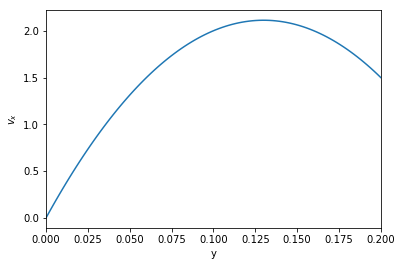

In [30]:
vx = np.linalg.solve(A, G)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y, np.concatenate([[v0], vx, [vB]]))
plt.xlabel('y')
plt.ylabel('$v_x$')
plt.xlim([0, B])
#plt.ylim([0, 0.15])

In [31]:
np.gradient?
vx0 = np.concatenate([[v0], vx, [vB]])
np.gradient(np.gradient(vx0, y, edge_order=2), y, edge_order=2)

array([-250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250.,
       -250., -250., -250., -250., -250., -250., -250., -250., -250., -250.])

Note that we have approximated the solution by discretizing and estimating the derivatives that the points. You have to check for convergence by increasing the number of points $N$.

This method worked because the BVP was *linear*, i.e. no products, powers, etc of derivatives, so that the final set of equations after discretization was linear. If the BVP was nonlinear, we would end up with a set of coupled nonlinear equations that you would have to use `scipy.optimize.fsolve` to solve, or `scipy.integrate.solve_bvp`, and these would both require an initial guess to solve.




# Things to look out for



Just because systems are linear doesn't mean they are well-behaved. Seemingly simple equations can show unexpected behavior. Consider

$-0.5 x1 + x2 = 1.1$

and

$-0.46 x1 + x2 = 1.0$

These are easy to solve.



In [1]:
import numpy as np

A = np.array([[-0.5, 1],
              [-0.46, 1]])
b = np.array([1.1, 1])

np.linalg.solve(A, b)

array([-2.5 , -0.15])

Now consider this slightly different system where we just change -0.46 to -0.47. Surely that should not be a big deal right?



In [1]:
A = np.array([[-0.5, 1],
              [-0.47, 1]])

b = np.array([1.1, 1])

np.linalg.solve(A, b)

array([-3.33333333, -0.56666667])

That seems like a big change in the answer for such a small change in one coefficient. What is happening? The determinant of this matrix is small, and the condition number is high, which means it is an ill-conditioned system of equations.



In [1]:
np.linalg.det(A), np.linalg.cond(A)

(-0.030000000000000023, 82.351190218007105)

Graphically, this means the two lines are nearly parallel, so even the smallest shift in the slope will result in a large change in the intersection.



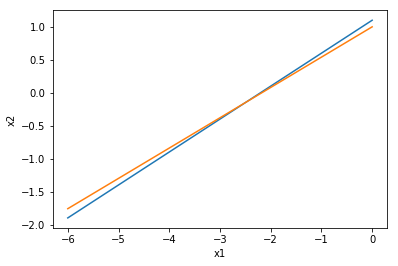

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

x1 = np.linspace(-6, 0)
x2_0 = 1.1 + 0.5 * x1
x2_1 = 1.0 + 0.46 * x1

plt.plot(x1, x2_0, x1, x2_1)
plt.xlabel('x1')
plt.ylabel('x2')

This system of equations is sensitive to roundoff errors, both in the coefficients of $\mathbf{A}$ and in the numerics of solving the equations.




# Leveraging linear algebra for iteration



Linear algebra can be used for iteration (for loops) in some cases. Doing this is usually faster because dedicated linear algebra libraries are very fast, and the code is usually shorter. However, it is trickier to write sometimes, and not everything can be done this way.

It can also be advantageous to use this approach in machine learning. Some frameworks are difficult to use loops in.

The dot product is defined as:

$\mathbf{a}\cdot\mathbf{b} = \sum_{i=0}^{N-1} a_i b_i$

For specificity we have these two vectors to start with:



In [1]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([3, 6, 8, 9, 10])

As defined, we could implement the dot product as:



In [1]:
dp = 0
for i in range(len(a)):
    dp += a[i] * b[i]

dp

125

We can do better than that with elementwise multiplication:



In [1]:
np.sum(a * b)

125

The best approach, however, is the linear algebra approach:



In [1]:
a @ b

125

Why is this better?

1.  It is short.
2.  It does not specify how the computation is done. This allows it to be done with an optimized (i.e. fast) and possibly parallelized algorithm. *Many* very smart people have worked hard to make linear algebra fast; we should try not to implement it ourselves.

Consider $y = \sum\limits_{i=1}^n w_i x_i^2$. This operation is like a weighted sum of squares.

The old-fashioned way to do this is with a loop.



In [1]:
w = np.array([0.1, 0.25, 0.12, 0.45, 0.98])
x = np.array([9, 7, 11, 12, 8])

y = 0
for wi, xi in zip(w, x):
   y += wi * xi**2
y

162.38999999999999

Compare this to the more modern numpy approach.



In [1]:
y = np.sum(w * x**2)

We can also express this in matrix algebra form. The operation is equivalent to $y = \mathbf{x} \cdot \mathbf{D_w} \cdot \mathbf{x}^T$ where $\mathbf{D_w}$ is a diagonal matrix with the weights on the diagonal.



In [1]:
x @ np.diag(w) @ x

162.38999999999999

Finally, consider the sum of the product of three vectors. Let $y = \sum\limits_{i=1}^n w_i x_i y_i$. This is like a weighted sum of products.



In [1]:
w = np.array([0.1, 0.25, 0.12, 0.45, 0.98])
x = np.array([9, 7, 11, 12, 8])
y = np.array([2, 5, 3, 8, 0])

print(np.sum(w * x * y))  # numpy vectorized approach
w @ np.diag(x) @ y # linear algebra approach

57.71


57.710000000000008


# Summary



In this lecture we considered several applications of linear algebra including:

1.  Solutions to steady state mass balances
2.  Finding independent reactions
3.  Solving linear boundary value problems

We also briefly touched on vectorized approaches to using linear algebra to avoid writing explicit loops.

